# 4. Convolutional Neural Networks

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.python.keras import Input, Model
from tensorflow.python.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.datasets import mnist, cifar10
from tensorflow.python.keras.utils import to_categorical

# Display plots inline 
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [0]:
# set random seeds for more reproducible results
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(43)

In [0]:
# load dataset
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)
gray = False
if len(x_train.shape)==4 and gray:
    x_train = np.mean(x_train, axis=-1, keepdims=True)
    x_test = np.mean(x_test, axis=-1, keepdims=True)
if len(x_train.shape)==3:
    x_train = np.expand_dims(x_train, axis=-1)
    x_test = np.expand_dims(x_test, axis=-1)
train_size = len(y_train)
test_size = len(y_test)
xdim = x_train.shape[1]
ydim = x_train.shape[2]
cdim = x_train.shape[3]
print(x_train.dtype, y_train.dtype)

(50000, 32, 32, 3) (50000, 1)
uint8 uint8


[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]


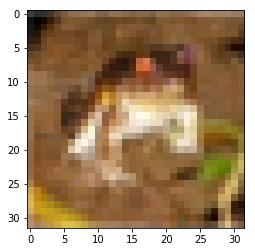

In [0]:
print(x_train[0])
print(y_train[0])
if gray:
    plt.imshow(x_train[0][..., 0], cmap='gray')
else:
    plt.imshow(x_train[0])

In [0]:
print(np.min(x_train), np.max(x_train), np.median(x_train))
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

0 255 117.0
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


In [0]:
n_classes = len(np.unique(y_test))
x_train, y_train = shuffle(x_train, y_train, random_state=44)
x_train = x_train/255
x_test = x_test/255
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [0]:
def get_model(bn):
    inputs = Input(shape=(xdim, ydim, cdim))
    f = Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
    if bn:
        f = BatchNormalization()(f)
    f = Conv2D(filters=32, kernel_size=3, activation='relu')(f)
    if bn:
        f = BatchNormalization()(f)
    f = MaxPooling2D()(f)
    f = Dropout(0.25)(f)
    f = Conv2D(filters=64, kernel_size=3, activation='relu')(f)
    if bn:
        f = BatchNormalization()(f)
    f = Conv2D(filters=64, kernel_size=3, activation='relu')(f)
    if bn:
        f = BatchNormalization()(f)
    f = MaxPooling2D()(f)
    f = Dropout(0.25)(f)
    f = Flatten()(f)
    f = Dense(512, activation='relu')(f)
    f = Dropout(0.5)(f)
    outputs = Dense(n_classes, activation='softmax')(f)
    return Model(inputs=inputs, outputs=outputs)

In [0]:
model = get_model(bn=False)
print(model.summary())
print((3*3*3+1)*32+(3*3*32+1)*32+(3*3*32+1)*64+(3*3*64+1)*64+((((32-2-2)/2-2-2)/2)**2*64+1)*512+(512+1)*10)
print('https://fomoro.com/tools/receptive-fields/#3,1,1,VALID;3,1,1,VALID;2,2,1,VALID;3,1,1,VALID;3,1,1,VALID;2,2,1,VALID')
print(3+2+1+2*(2+2+1))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=300, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
__________

40000/40000 [==============================] - 7s 171us/step - loss: 0.5144 - acc: 0.8184 - val_loss: 0.6427 - val_acc: 0.7811
Epoch 102/300
40000/40000 [==============================] - 7s 174us/step - loss: 0.5054 - acc: 0.8208 - val_loss: 0.6516 - val_acc: 0.7772
Epoch 103/300
40000/40000 [==============================] - 7s 172us/step - loss: 0.5115 - acc: 0.8179 - val_loss: 0.6211 - val_acc: 0.7880
Epoch 104/300
40000/40000 [==============================] - 7s 173us/step - loss: 0.5027 - acc: 0.8216 - val_loss: 0.6193 - val_acc: 0.7871
Epoch 105/300
40000/40000 [==============================] - 7s 172us/step - loss: 0.4990 - acc: 0.8251 - val_loss: 0.6145 - val_acc: 0.7857
Epoch 106/300
40000/40000 [==============================] - 7s 171us/step - loss: 0.4927 - acc: 0.8227 - val_loss: 0.6165 - val_acc: 0.7889
Epoch 107/300
40000/40000 [==============================] - 7s 173us/step - loss: 0.4939 - acc: 0.8230 - val_loss: 0.6254 - val_acc: 0.7852
Epoch 108/300
40000/40000 [

40000/40000 [==============================] - 7s 173us/step - loss: 0.2298 - acc: 0.9165 - val_loss: 0.6535 - val_acc: 0.8072
Epoch 218/300
40000/40000 [==============================] - 7s 172us/step - loss: 0.2284 - acc: 0.9168 - val_loss: 0.6455 - val_acc: 0.8071
Epoch 219/300
40000/40000 [==============================] - 7s 174us/step - loss: 0.2232 - acc: 0.9200 - val_loss: 0.6537 - val_acc: 0.8067
Epoch 220/300
40000/40000 [==============================] - 7s 184us/step - loss: 0.2243 - acc: 0.9190 - val_loss: 0.6646 - val_acc: 0.8059
Epoch 221/300
40000/40000 [==============================] - 7s 177us/step - loss: 0.2271 - acc: 0.9174 - val_loss: 0.6683 - val_acc: 0.8048
Epoch 222/300
40000/40000 [==============================] - 7s 173us/step - loss: 0.2202 - acc: 0.9206 - val_loss: 0.6711 - val_acc: 0.8036
Epoch 223/300
40000/40000 [==============================] - 7s 172us/step - loss: 0.2259 - acc: 0.9196 - val_loss: 0.6666 - val_acc: 0.8033
Epoch 224/300
40000/40000 [

In [0]:
model = get_model(bn=True)
print(model.summary())
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=300, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
__________

Epoch 41/300
40000/40000 [==============================] - 8s 207us/step - loss: 0.5613 - acc: 0.8019 - val_loss: 0.6158 - val_acc: 0.7877
Epoch 42/300
40000/40000 [==============================] - 9s 214us/step - loss: 0.5514 - acc: 0.8040 - val_loss: 0.6177 - val_acc: 0.7881
Epoch 43/300
40000/40000 [==============================] - 8s 206us/step - loss: 0.5435 - acc: 0.8059 - val_loss: 0.6461 - val_acc: 0.7749
Epoch 44/300
40000/40000 [==============================] - 8s 206us/step - loss: 0.5372 - acc: 0.8082 - val_loss: 0.6340 - val_acc: 0.7808
Epoch 45/300
40000/40000 [==============================] - 8s 206us/step - loss: 0.5321 - acc: 0.8109 - val_loss: 0.6417 - val_acc: 0.7791
Epoch 46/300
40000/40000 [==============================] - 8s 209us/step - loss: 0.5259 - acc: 0.8129 - val_loss: 0.6027 - val_acc: 0.7895
Epoch 47/300
40000/40000 [==============================] - 8s 208us/step - loss: 0.5126 - acc: 0.8152 - val_loss: 0.6245 - val_acc: 0.7835
Epoch 48/300
40000/4

40000/40000 [==============================] - 9s 216us/step - loss: 0.1922 - acc: 0.9317 - val_loss: 0.5999 - val_acc: 0.8277
Epoch 158/300
40000/40000 [==============================] - 8s 211us/step - loss: 0.1928 - acc: 0.9310 - val_loss: 0.6088 - val_acc: 0.8240
Epoch 159/300
40000/40000 [==============================] - 8s 210us/step - loss: 0.1919 - acc: 0.9303 - val_loss: 0.6135 - val_acc: 0.8243
Epoch 160/300
40000/40000 [==============================] - 8s 211us/step - loss: 0.1897 - acc: 0.9318 - val_loss: 0.6421 - val_acc: 0.8193
Epoch 161/300
40000/40000 [==============================] - 8s 209us/step - loss: 0.1905 - acc: 0.9327 - val_loss: 0.6381 - val_acc: 0.8218
Epoch 162/300
40000/40000 [==============================] - 8s 210us/step - loss: 0.1845 - acc: 0.9335 - val_loss: 0.6311 - val_acc: 0.8239
Epoch 163/300
40000/40000 [==============================] - 8s 211us/step - loss: 0.1881 - acc: 0.9335 - val_loss: 0.6336 - val_acc: 0.8201
Epoch 164/300
40000/40000 [

40000/40000 [==============================] - 8s 207us/step - loss: 0.1164 - acc: 0.9585 - val_loss: 0.6827 - val_acc: 0.8284
Epoch 274/300
40000/40000 [==============================] - 9s 214us/step - loss: 0.1127 - acc: 0.9590 - val_loss: 0.6899 - val_acc: 0.8289
Epoch 275/300
40000/40000 [==============================] - 8s 209us/step - loss: 0.1135 - acc: 0.9603 - val_loss: 0.6936 - val_acc: 0.8295
Epoch 276/300
40000/40000 [==============================] - 9s 229us/step - loss: 0.1120 - acc: 0.9606 - val_loss: 0.6733 - val_acc: 0.8319
Epoch 277/300
40000/40000 [==============================] - 9s 231us/step - loss: 0.1125 - acc: 0.9610 - val_loss: 0.6790 - val_acc: 0.8322
Epoch 278/300
40000/40000 [==============================] - 9s 227us/step - loss: 0.1129 - acc: 0.9598 - val_loss: 0.7065 - val_acc: 0.8297
Epoch 279/300
40000/40000 [==============================] - 8s 211us/step - loss: 0.1131 - acc: 0.9602 - val_loss: 0.7174 - val_acc: 0.8241
Epoch 280/300
40000/40000 [

In [0]:
model = get_model(bn=True)
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)

valid_idx = int(train_size*0.8)
aug_train_data = datagen.flow(x=x_train[:valid_idx], y=y_train[:valid_idx], batch_size=64, seed=45)
valid_data = (x_train[valid_idx:], y_train[valid_idx:])
model.fit_generator(aug_train_data, epochs=300, validation_data=valid_data)

Epoch 1/300
625/625 [==============================] - 18s 29ms/step - loss: 2.0659 - acc: 0.3031 - val_loss: 1.7626 - val_acc: 0.3667
Epoch 2/300
625/625 [==============================] - 16s 25ms/step - loss: 1.6216 - acc: 0.4066 - val_loss: 1.5535 - val_acc: 0.4336
Epoch 3/300
625/625 [==============================] - 16s 25ms/step - loss: 1.5103 - acc: 0.4462 - val_loss: 1.4653 - val_acc: 0.4719
Epoch 4/300
625/625 [==============================] - 15s 25ms/step - loss: 1.4270 - acc: 0.4811 - val_loss: 1.5197 - val_acc: 0.4816
Epoch 5/300
625/625 [==============================] - 16s 25ms/step - loss: 1.3597 - acc: 0.5065 - val_loss: 1.4337 - val_acc: 0.5060
Epoch 6/300
625/625 [==============================] - 16s 25ms/step - loss: 1.3107 - acc: 0.5263 - val_loss: 1.3014 - val_acc: 0.5417
Epoch 7/300
625/625 [==============================] - 15s 24ms/step - loss: 1.2590 - acc: 0.5444 - val_loss: 1.1053 - val_acc: 0.6041
Epoch 8/300
625/625 [==============================] - 

Epoch 61/300
625/625 [==============================] - 16s 26ms/step - loss: 0.7057 - acc: 0.7518 - val_loss: 0.6700 - val_acc: 0.7710061 - acc: 0.7 - ETA: 0s - loss: 0.7064 - a
Epoch 62/300
625/625 [==============================] - 16s 26ms/step - loss: 0.7010 - acc: 0.7539 - val_loss: 0.6642 - val_acc: 0.7729
Epoch 63/300
625/625 [==============================] - 16s 25ms/step - loss: 0.7019 - acc: 0.7532 - val_loss: 0.6932 - val_acc: 0.7599
Epoch 64/300
625/625 [==============================] - 16s 25ms/step - loss: 0.6942 - acc: 0.7543 - val_loss: 0.6067 - val_acc: 0.7894
Epoch 65/300
625/625 [==============================] - 16s 26ms/step - loss: 0.6963 - acc: 0.7571 - val_loss: 0.5916 - val_acc: 0.7919
Epoch 66/300
625/625 [==============================] - 16s 26ms/step - loss: 0.6970 - acc: 0.7534 - val_loss: 0.6134 - val_acc: 0.7840
Epoch 67/300
625/625 [==============================] - 16s 26ms/step - loss: 0.6903 - acc: 0.7593 - val_loss: 0.7089 - val_acc: 0.7580
Epoch

625/625 [==============================] - 16s 26ms/step - loss: 0.5161 - acc: 0.8197 - val_loss: 0.4847 - val_acc: 0.8347
Epoch 178/300
625/625 [==============================] - 17s 27ms/step - loss: 0.5161 - acc: 0.8187 - val_loss: 0.5185 - val_acc: 0.8192
Epoch 179/300
625/625 [==============================] - 17s 27ms/step - loss: 0.5093 - acc: 0.8218 - val_loss: 0.4732 - val_acc: 0.8332
Epoch 180/300
625/625 [==============================] - 17s 27ms/step - loss: 0.5123 - acc: 0.8206 - val_loss: 0.4545 - val_acc: 0.8437
Epoch 181/300
625/625 [==============================] - 17s 27ms/step - loss: 0.5139 - acc: 0.8197 - val_loss: 0.4732 - val_acc: 0.8384
Epoch 182/300
625/625 [==============================] - 17s 27ms/step - loss: 0.5033 - acc: 0.8228 - val_loss: 0.4597 - val_acc: 0.8403
Epoch 183/300
625/625 [==============================] - 17s 28ms/step - loss: 0.5124 - acc: 0.8192 - val_loss: 0.5161 - val_acc: 0.8231
Epoch 184/300
625/625 [==============================] 

625/625 [==============================] - 17s 28ms/step - loss: 0.4395 - acc: 0.8449 - val_loss: 0.4619 - val_acc: 0.8437
Epoch 294/300
625/625 [==============================] - 19s 30ms/step - loss: 0.4365 - acc: 0.8461 - val_loss: 0.4541 - val_acc: 0.8447
Epoch 295/300
625/625 [==============================] - 18s 28ms/step - loss: 0.4364 - acc: 0.8490 - val_loss: 0.4156 - val_acc: 0.8588
Epoch 296/300
625/625 [==============================] - 17s 27ms/step - loss: 0.4404 - acc: 0.8470 - val_loss: 0.4181 - val_acc: 0.8576
Epoch 297/300
625/625 [==============================] - 17s 27ms/step - loss: 0.4417 - acc: 0.8463 - val_loss: 0.4367 - val_acc: 0.8498
Epoch 298/300
625/625 [==============================] - 16s 26ms/step - loss: 0.4424 - acc: 0.8449 - val_loss: 0.4054 - val_acc: 0.8610
Epoch 299/300
625/625 [==============================] - 17s 27ms/step - loss: 0.4331 - acc: 0.8476 - val_loss: 0.4422 - val_acc: 0.8517
Epoch 300/300
625/625 [==============================] 

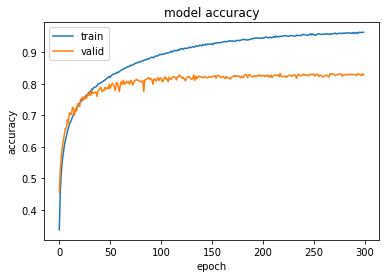

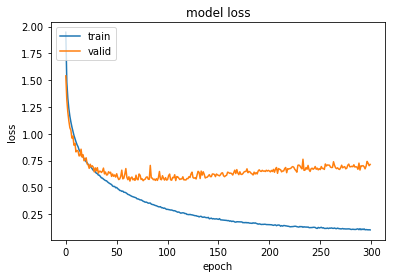

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
loss, acc = model.evaluate(x=x_test, y=y_test)
print(loss, acc)
targets = np.argmax(y_test, axis=-1)
probabilities = model.predict(x=x_test)
predictions = np.argmax(probabilities, axis=-1)
cm = confusion_matrix(y_true=targets, y_pred=predictions)
print(cm)

10000/10000 [==============================] - 2s 161us/step
0.441881593811512 0.8517
[[878  18  19  12   9   0  10   6  29  19]
 [  4 943   2   1   1   1   4   2   8  34]
 [ 46   2 728  33  53  38  79  15   3   3]
 [ 20   8  21 675  36 103  96  21  11   9]
 [  5   0  25  14 873   8  51  21   3   0]
 [  7   1  19 105  29 778  35  20   2   4]
 [  4   1  11  10   5   5 962   1   1   0]
 [ 12   2  15  23  37  22  16 864   1   8]
 [ 41  19   2   7   2   0   5   2 904  18]
 [ 12  47   4   3   2   0   5   3  12 912]]


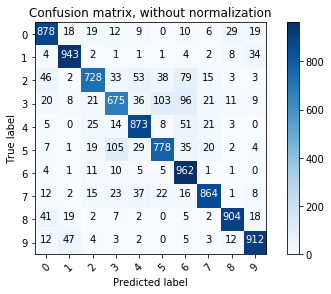

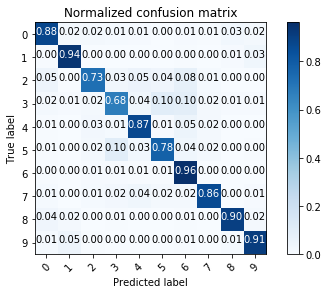

In [0]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix, without normalization'

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    np.set_printoptions(precision=2)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

classes = np.arange(n_classes)
plot_confusion_matrix(cm, classes=classes)
plot_confusion_matrix(cm, classes=classes, normalize=True)

In [0]:
from sklearn.metrics import classification_report
report = classification_report(y_true=targets, y_pred=predictions, labels=classes)
print(report)

             precision    recall  f1-score   support

          0       0.85      0.88      0.87      1000
          1       0.91      0.94      0.92      1000
          2       0.86      0.73      0.79      1000
          3       0.76      0.68      0.72      1000
          4       0.83      0.87      0.85      1000
          5       0.81      0.78      0.80      1000
          6       0.76      0.96      0.85      1000
          7       0.90      0.86      0.88      1000
          8       0.93      0.90      0.92      1000
          9       0.91      0.91      0.91      1000

avg / total       0.85      0.85      0.85     10000



loss	index	true	predicted	probability
2.5307	2405	3	6		1.0000
1.9380	5416	9	1		0.9999
1.7685	3501	9	1		0.9999
1.7639	1506	5	7		0.9997
1.5773	8757	8	6		0.9103
1.5669	4139	5	4		0.9972
1.5261	853	9	1		0.9995
1.4147	5511	3	6		0.9985
1.4072	7068	2	0		0.9986
1.4022	9449	9	1		0.9985


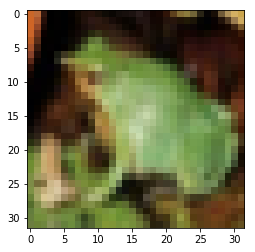

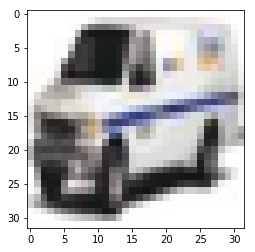

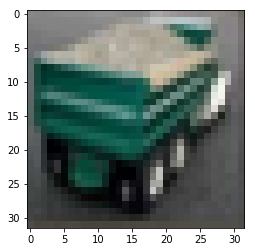

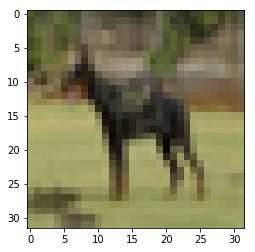

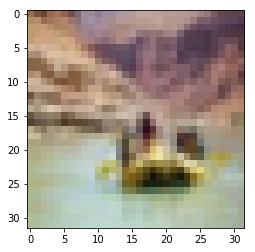

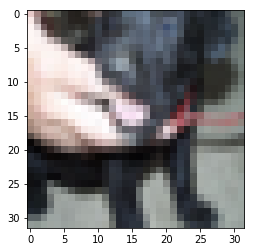

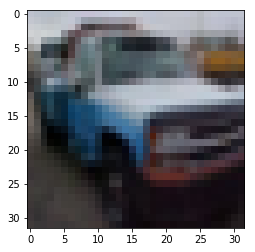

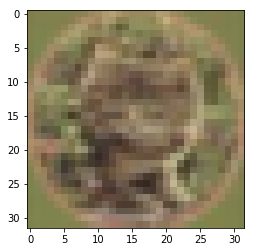

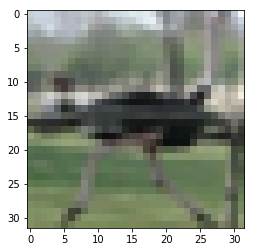

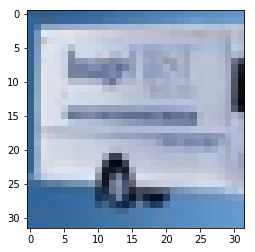

In [0]:
# top errors
from sklearn.metrics import log_loss
max_probs = np.max(probabilities, axis=-1)
losses = [log_loss(y_true=y, y_pred=prob, eps=1e-7) for y,prob in zip(y_test,probabilities)]
print('loss\tindex\ttrue\tpredicted\tprobability')
top_errors = sorted(list(zip(losses, np.arange(test_size), targets, predictions, max_probs)), reverse=True)[:10]
for error in top_errors:
    print('%.04f\t%d\t%d\t%d\t\t%.04f'%error)
    plt.figure()
    if gray:
        plt.imshow(x_test[error[1]][..., 0], cmap='gray')
    else:
        plt.imshow(x_test[error[1]])

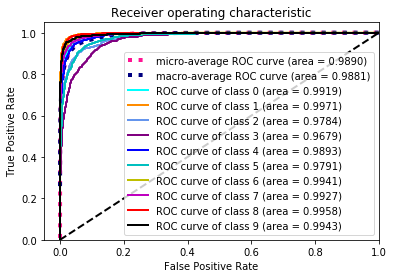

In [0]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probabilities.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'purple', 'b', 'c', 'y', 'm', 'r', 'k', 'g'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()